# Importing  

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data from Excel Sheet

In [2]:
file_name =  "Dataset.xlsx"
sheet =  'Loan'

df = pd.read_excel(io=file_name, sheet_name=sheet)
df=df.head(100) #Select first 100 rows

# Data Processing

## Select the given attributes

In [3]:
df=df[['loan_type', 'loan_amount', 'Interest_rate_spread', 'term', 'age','Status']]
df

,loan_type,loan_amount,Interest_rate_spread,term,age,Status
0,type1,116500,NaN,360.0,25-34,1
1,type2,206500,NaN,360.0,55-64,1
2,type1,406500,0.2000,360.0,35-44,0
3,type1,456500,0.6810,360.0,45-54,0
4,type1,696500,0.3042,360.0,25-34,0
...,...,...,...,...,...,...
95,type2,76500,1.3051,300.0,35-44,0
96,type3,286500,NaN,360.0,65-74,1
97,type1,136500,0.5440,180.0,55-64,0
98,type1,486500,-0.1680,360.0,45-54,0


## Check if there is any column with "nan" values

In [4]:
df.isnull().any()

loan_type               False
loan_amount             False
Interest_rate_spread     True
term                    False
age                     False
Status                  False
dtype: bool

## Change the intervals to midpoint values

In [5]:
for i in df['age']:
    if i == '<25':
        df['age'] = df['age'].replace(['<25'],19.5)
    elif i == '25-34':
        df['age'] = df['age'].replace(['25-34'],29.5)
    elif i== '35-44':
        df['age'] = df['age'].replace(['35-44'],39.5)
    elif i== '45-54':
        df['age'] = df['age'].replace(['45-54'],49.5)
    elif i== '55-64':
        df['age'] = df['age'].replace(['55-64'],59.5)
    elif i== '65-74':
        df['age'] = df['age'].replace(['65-74'],69.5)
    elif i== '>74':
        df['age'] = df['age'].replace(['>74'],79.5)

## Replace "nan" with Median Value

In [6]:
median_irs=df['Interest_rate_spread'].median()
df['Interest_rate_spread'] = df['Interest_rate_spread'].replace(np.nan, median_irs)

## Change string to Int/Float

In [7]:
for i in df['loan_type']:
    if i == 'type1':
        df['loan_type'] = df['loan_type'].replace(['type1'],'0')
    elif i == 'type2':
        df['loan_type'] = df['loan_type'].replace(['type2'],'1')
    elif i == 'type3':
        df['loan_type'] = df['loan_type'].replace(['type3'],'2')

# Exploratory Data Analysis

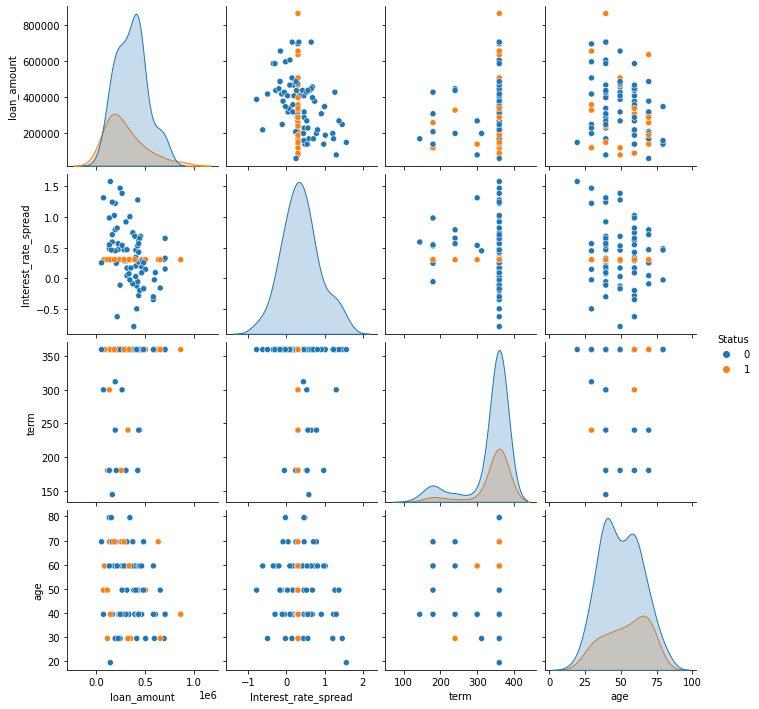

In [8]:
sns.pairplot(data=df, hue = 'Status')

# Model Fitting & Test

## Split Input and Target Columns and Split Train-Test Data 

In [9]:
target = df['Status']
df = df.drop('Status', axis =1)


X = df
Y = target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)   

## Use Decision Tree Classifier

In [10]:
clsf_ent = DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=3, min_samples_leaf=5)
  

clsf_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

## Plot Tree

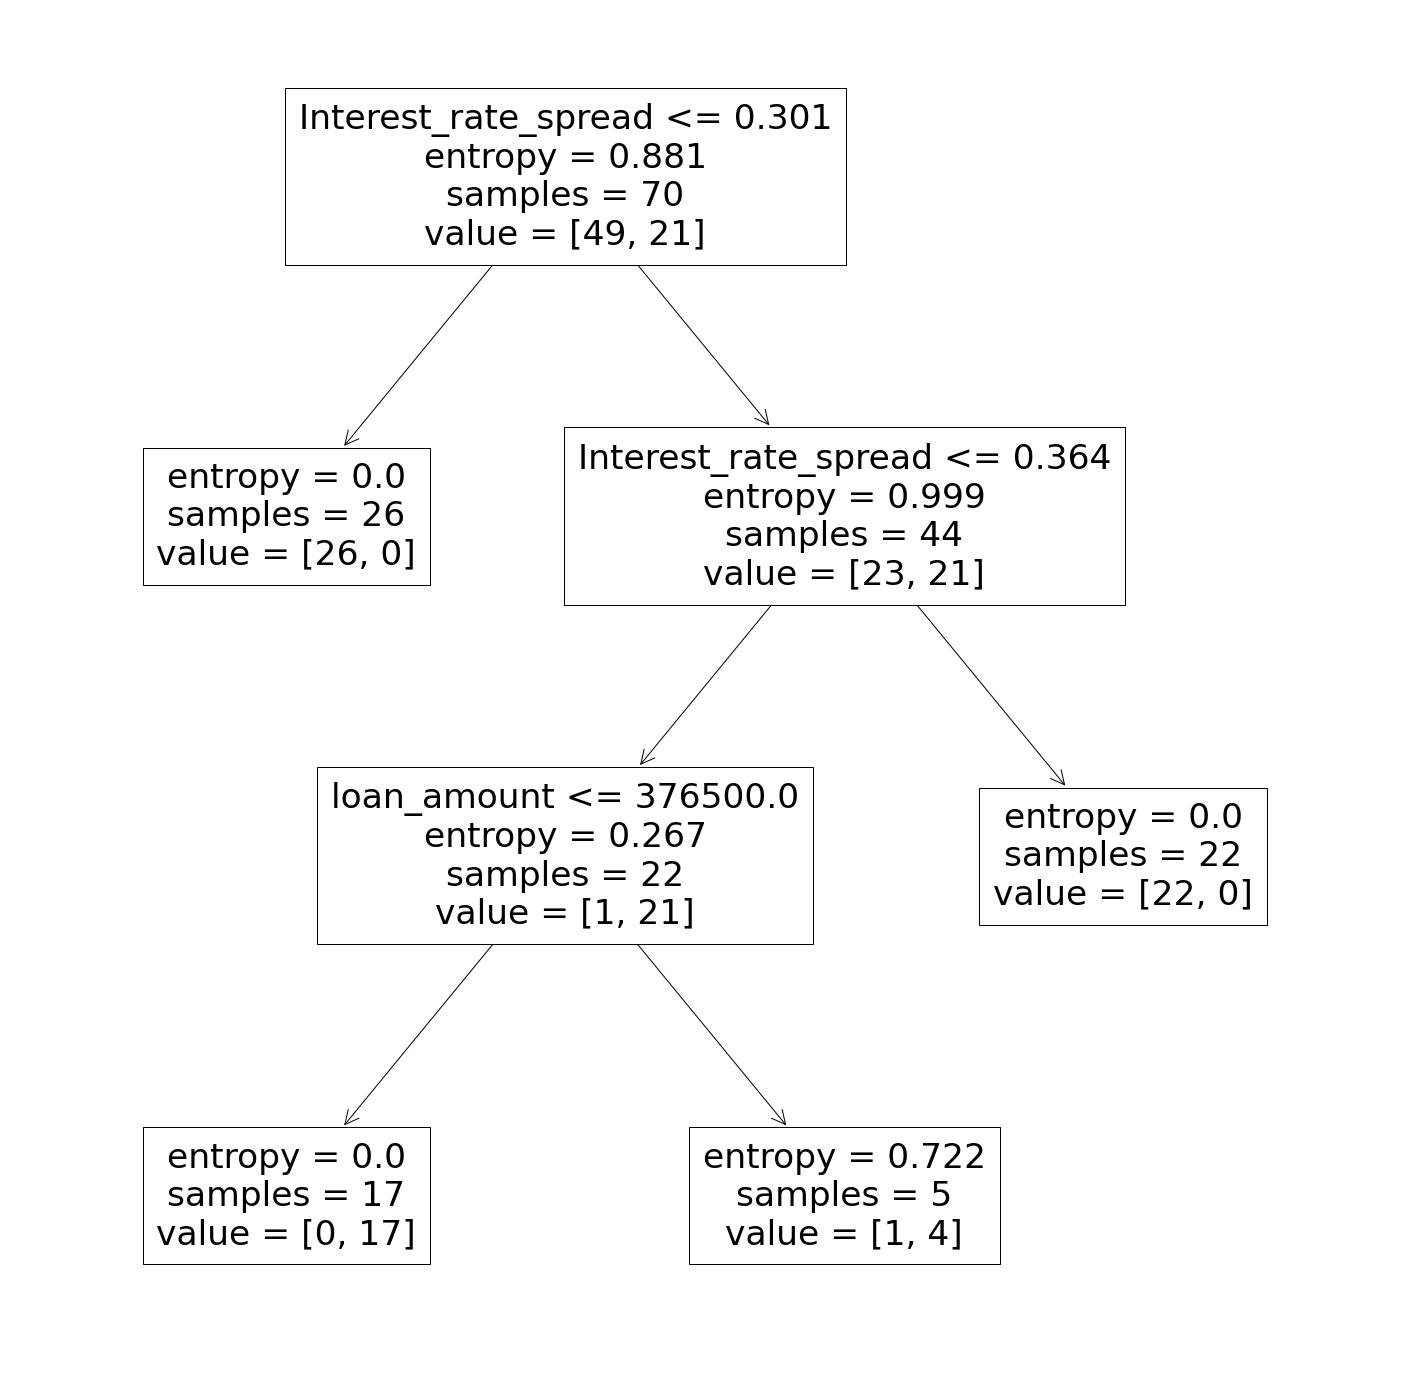

In [11]:
fig, ax = plt.subplots(figsize=(25, 25))
tree.plot_tree(clsf_ent,ax=ax,feature_names=['loan_type', 'loan_amount', 'Interest_rate_spread', 'term', 'age'])
plt.show()

## Show Predicted Values

In [12]:
y_pred = clsf_ent.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0]


## Show Results

In [13]:
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
      
print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
      
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[22  2]
 [ 0  6]]
Accuracy :  93.33333333333333
Report :                precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.75      1.00      0.86         6

    accuracy                           0.93        30
   macro avg       0.88      0.96      0.91        30
weighted avg       0.95      0.93      0.94        30



## Confusion Matrix - Using Seaborn

Text(0.5, 1.0, 'Accuracy Score: 93.33')

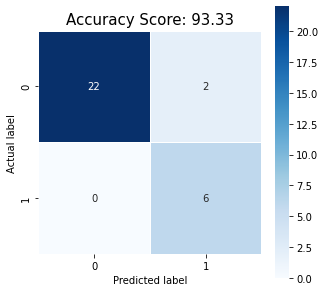

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {:.2f}'.format(accuracy_score(y_test,y_pred)*100)
plt.title(all_sample_title, size = 15)